# Market Basket Analysis with Apriori Algorithm

Apriori algorithm is a machine learning model used in Association Rule Learning to uncover meaningful correlations between products according to their co-occurrence in a dataset. Common use cases for market basket analysis are building recommendation engine, cross-selling and upselling products.

## Importing the libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

To perform a Market Basket Analysis with the Apriori Algorithm, we will be using the takeaway orders dataset from [Kaggle](https://www.kaggle.com/datasets/henslersoftware/19560-indian-takeaway-orders/data). This CSV files contain 33055 orders from two Indian takeaway restaurants in London, UK.

In [2]:
orders = pd.read_csv('takeaway_food_orders.csv')

In [3]:
orders.head()

,order_id,order_date,item_name,quantity,product_price,Item_total
0,630_1,01-09-2015 14:42,Onion Bhaji,1,3.95,3.95
1,647_1,08-09-2015 17:12,Onion Bhaji,1,3.95,3.95
2,648_1,08-09-2015 17:31,Onion Bhaji,1,3.95,3.95
3,651_1,08-09-2015 17:56,Onion Bhaji,1,3.95,3.95
4,764_1,09-09-2015 09:31,Onion Bhaji,1,3.95,3.95


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194001 entries, 0 to 194000
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       194001 non-null  object 
 1   order_date     194001 non-null  object 
 2   item_name      194001 non-null  object 
 3   quantity       194001 non-null  int64  
 4   product_price  194001 non-null  float64
 5   Item_total     194001 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 8.9+ MB


In [5]:
orders['item_name'] = orders['item_name'].str.lower()

## EDA

In [6]:
total_orders = orders['order_id'].nunique()
total_orders

33055

In [7]:
orders['item_name'].nunique()

346

There are 346 unique items in the dataset.

In [8]:
item_frequency = orders['item_name'].value_counts().reset_index()
item_frequency.head()

,item_name,count
0,pilau rice,13093
1,plain papadum,10030
2,naan,6681
3,garlic naan,6549
4,bombay aloo,5880


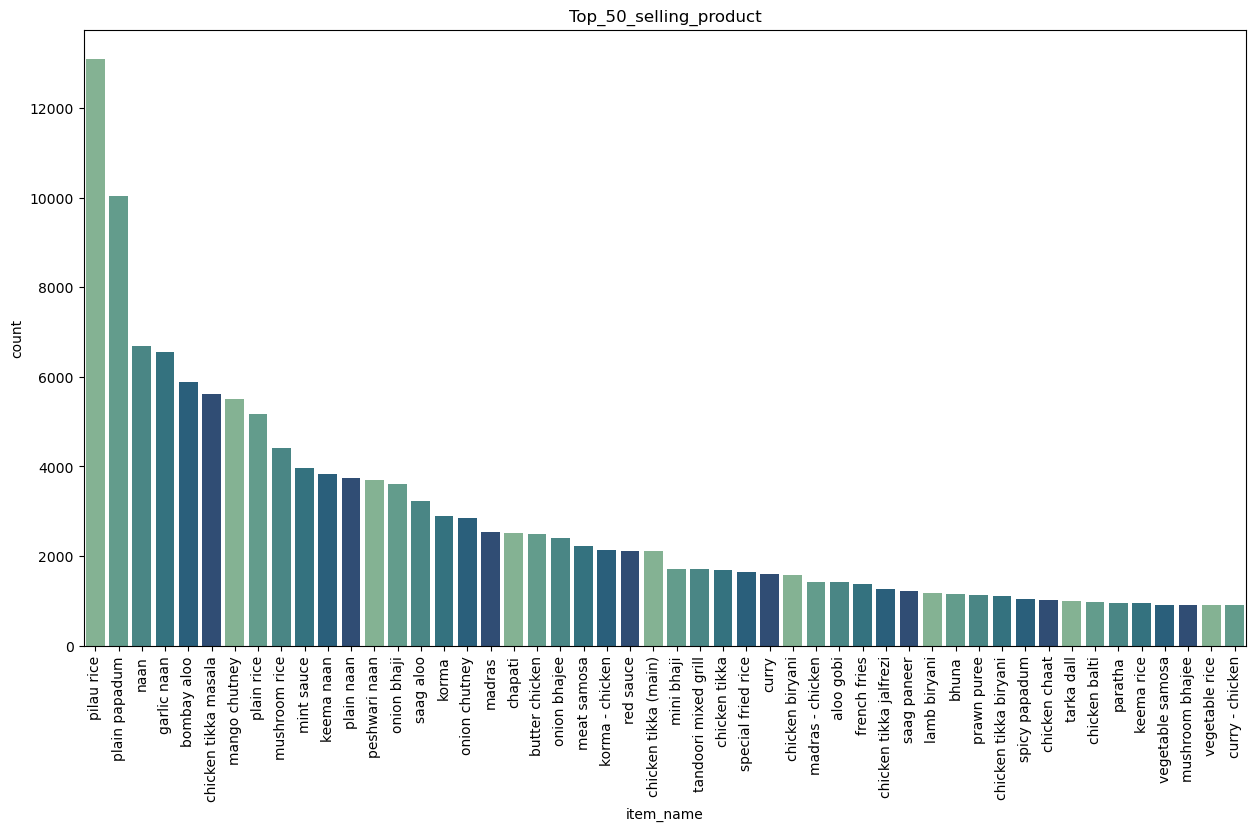

In [9]:
plt.figure(figsize=(15,8))
sns.barplot(data=item_frequency[:50],x='item_name',y='count',palette=sns.color_palette('crest'))
plt.xticks(rotation=90)
plt.title("Top_50_selling_product")
plt.show()

## Apriori Algorithm

Apriori model takes inputs in a list format. We need to transform our orders data frame into a list of transactions.

In [10]:
orders['item_name'] = orders['item_name'].transform(lambda x: [x])

In [11]:
orders.head()

,order_id,order_date,item_name,quantity,product_price,Item_total
0,630_1,01-09-2015 14:42,[onion bhaji],1,3.95,3.95
1,647_1,08-09-2015 17:12,[onion bhaji],1,3.95,3.95
2,648_1,08-09-2015 17:31,[onion bhaji],1,3.95,3.95
3,651_1,08-09-2015 17:56,[onion bhaji],1,3.95,3.95
4,764_1,09-09-2015 09:31,[onion bhaji],1,3.95,3.95


In [12]:
basket = orders[['order_id','order_date','item_name']].groupby(['order_id','order_date']).sum().reset_index()

In [13]:
basket.head()

,order_id,order_date,item_name
0,10000_1,19-06-2018 18:10,"[plain rice, royal paneer, aloo gobi, saag alo..."
1,10000_2,02-06-2017 19:27,"[mint sauce, plain papadum, naan, plain rice, ..."
2,10001_1,19-06-2018 18:16,"[bombay aloo, dupiaza - chicken, king prawn bi..."
3,10001_2,02-06-2017 19:28,"[mint sauce, plain papadum, chapati, pilau ric..."
4,10002_1,19-06-2018 18:30,"[garlic naan, paratha, aloo chaat, sheek kebab..."


To construct association rules between items, the algorithm considers 3 factors which are, support, confidence and lift.

**Support:** The support of item X is the ratio of transactions containing the item X and the total number of transactions.

**Confidence:** The confidence between two items X and Y, is ratio of total number of transactions containing both items X and Y and the total number of transactions containing X. Simply put, it is the probability of item Y is purchased given that item X has already been purchased.

**Lift:** Lift is the ratio between the confidence between two items X and Y and support of item X. Lift measures how likely an item is purchased when another item is purchased, while controlling for how popular both items are.

In [14]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [15]:
encoder = TransactionEncoder()
X = encoder.fit_transform(basket['item_name'].to_list())
transactions = pd.DataFrame(X, columns=encoder.columns_)
transactions.head()

,achar chicken,achar lamb,aloo brinjal,aloo chaat,aloo dupiaza,aloo gobi,aloo methi,aloo mithy,aloo peas,baingan hari mirch,...,vegetable samosa,vindaloo,vindaloo - chicken,vindaloo - chicken tikka,vindaloo - chicken-tikka,vindaloo - king prawn,vindaloo - king-prawn,vindaloo - lamb,vindaloo - prawn,vindaloo sauce
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The data frame records each row as a transaction, and the items that were purchased in the transaction will be recorded as True.

Since the main idea of Apriori is 

**'All subsets of a frequent itemset must be frequent (Apriori property). If an itemset is infrequent, all its supersets will be infrequent.'**

We will use only the top 25% frequent items to calculate minimum support.

We will calculate the Maximum length for the itemsets to be generated based on the median order size.

For any value higher than 1, lift shows that there is actually an association. The higher the value, the higher the association.

In [16]:
support_cal = item_frequency['count'].quantile(0.75)
support = support_cal/total_orders
support

0.01352291635153532

In [17]:
itemsets_len = basket['item_name'].apply(len).median()
itemsets_len

5.0

In [18]:
frequent_itemsets = apriori(transactions, min_support= support, use_colnames=True, max_len = itemsets_len)
rules = association_rules(frequent_itemsets, metric="lift",  min_threshold = 2)

In [19]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(lime pickle),(plain papadum),0.023083,0.303343,0.016790,0.727392,2.397919,0.009788,2.555526,0.596746
1,(plain papadum),(lime pickle),0.303343,0.023083,0.016790,0.055351,2.397919,0.009788,1.034159,0.836813
2,(mango chutney),(mint sauce),0.166510,0.119831,0.055635,0.334121,2.788275,0.035682,1.321815,0.769482
3,(mint sauce),(mango chutney),0.119831,0.166510,0.055635,0.464277,2.788275,0.035682,1.555821,0.728673
4,(mango chutney),(onion chutney),0.166510,0.086129,0.048465,0.291061,3.379355,0.034123,1.289068,0.844744


In [20]:
rules = rules.sort_values("lift",ascending=False).reset_index(drop=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(red sauce, mango chutney)",(onion chutney),0.032552,0.086129,0.014491,0.445167,5.168600,0.011687,1.647111,0.833661
1,(onion chutney),"(red sauce, mango chutney)",0.086129,0.032552,0.014491,0.168247,5.168600,0.011687,1.163144,0.882536
2,"(mango chutney, mint sauce)","(plain papadum, onion chutney)",0.055635,0.069460,0.019936,0.358347,5.159041,0.016072,1.450223,0.853658
3,"(plain papadum, onion chutney)","(mango chutney, mint sauce)",0.069460,0.055635,0.019936,0.287021,5.159041,0.016072,1.324535,0.866342
4,"(onion chutney, pilau rice)","(plain papadum, mint sauce)",0.040932,0.091968,0.018031,0.440503,4.789741,0.014266,1.622942,0.824989
...,...,...,...,...,...,...,...,...,...,...
381,"(plain papadum, mango chutney)","(onion bhaji, pilau rice)",0.134806,0.049493,0.014552,0.107944,2.180990,0.007880,1.065524,0.625862
382,"(onion bhaji, pilau rice)",(naan),0.049493,0.202057,0.021510,0.434597,2.150859,0.011509,1.411280,0.562931
383,(naan),"(onion bhaji, pilau rice)",0.202057,0.049493,0.021510,0.106453,2.150859,0.011509,1.063746,0.670561
384,"(plain papadum, onion bhaji)",(naan),0.046256,0.202057,0.019029,0.411380,2.035958,0.009682,1.355616,0.533509


From the association_rules results above, we can see that mango chutney, red sauce and onion chutney are the items that have the highest association since these two items has the highest “lift” value.

We will now use Graph-based techniques to visualize association rules using vertices and edges, where one set of vertices annotated with item labels, and Itemsets or rules are represented as a second set of vertices.

Since there are 386 rules in total, we will use a subset of rules for visualization. For simplicity we will find out which products drive the sales of tikka.

In [21]:
tikka_rules = rules[rules['consequents'].astype(str).str.contains('tikka')].reset_index(drop=True)
tikka_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(pilau rice, mint sauce)","(plain papadum, chicken tikka masala)",0.057934,0.063591,0.015883,0.274151,4.311168,0.012199,1.290089,0.815276
1,"(mango chutney, pilau rice)","(plain papadum, chicken tikka masala)",0.081682,0.063591,0.019997,0.244815,3.849835,0.014803,1.239973,0.806092
2,"(plain papadum, pilau rice)","(mango chutney, chicken tikka masala)",0.152080,0.035426,0.019997,0.131490,3.711700,0.014609,1.110608,0.861616
3,"(plain papadum, pilau rice)","(chicken tikka masala, mint sauce)",0.152080,0.029587,0.015883,0.104436,3.529789,0.011383,1.083577,0.845241
4,(mint sauce),"(mango chutney, chicken tikka masala)",0.119831,0.035426,0.014219,0.118657,3.349448,0.009974,1.094437,0.796941
5,(mint sauce),"(plain papadum, chicken tikka masala)",0.119831,0.063591,0.024777,0.206766,3.251498,0.017157,1.180495,0.786723
6,(mint sauce),"(plain papadum, chicken tikka masala, pilau rice)",0.119831,0.041809,0.015883,0.132542,3.170178,0.010873,1.104597,0.777760
7,(plain papadum),"(mango chutney, chicken tikka masala, pilau rice)",0.303343,0.022296,0.019997,0.065922,2.956651,0.013234,1.046705,0.949936
8,(mango chutney),"(plain papadum, chicken tikka masala)",0.166510,0.063591,0.030827,0.185138,2.911389,0.020239,1.149163,0.787678
9,(mango chutney),"(chicken tikka masala, mint sauce)",0.166510,0.029587,0.014219,0.085392,2.886142,0.009292,1.061016,0.784073


In [22]:
import networkx as nx

In [23]:
graph = nx.from_pandas_edgelist(tikka_rules,source='antecedents',target='consequents',create_using = nx.DiGraph())

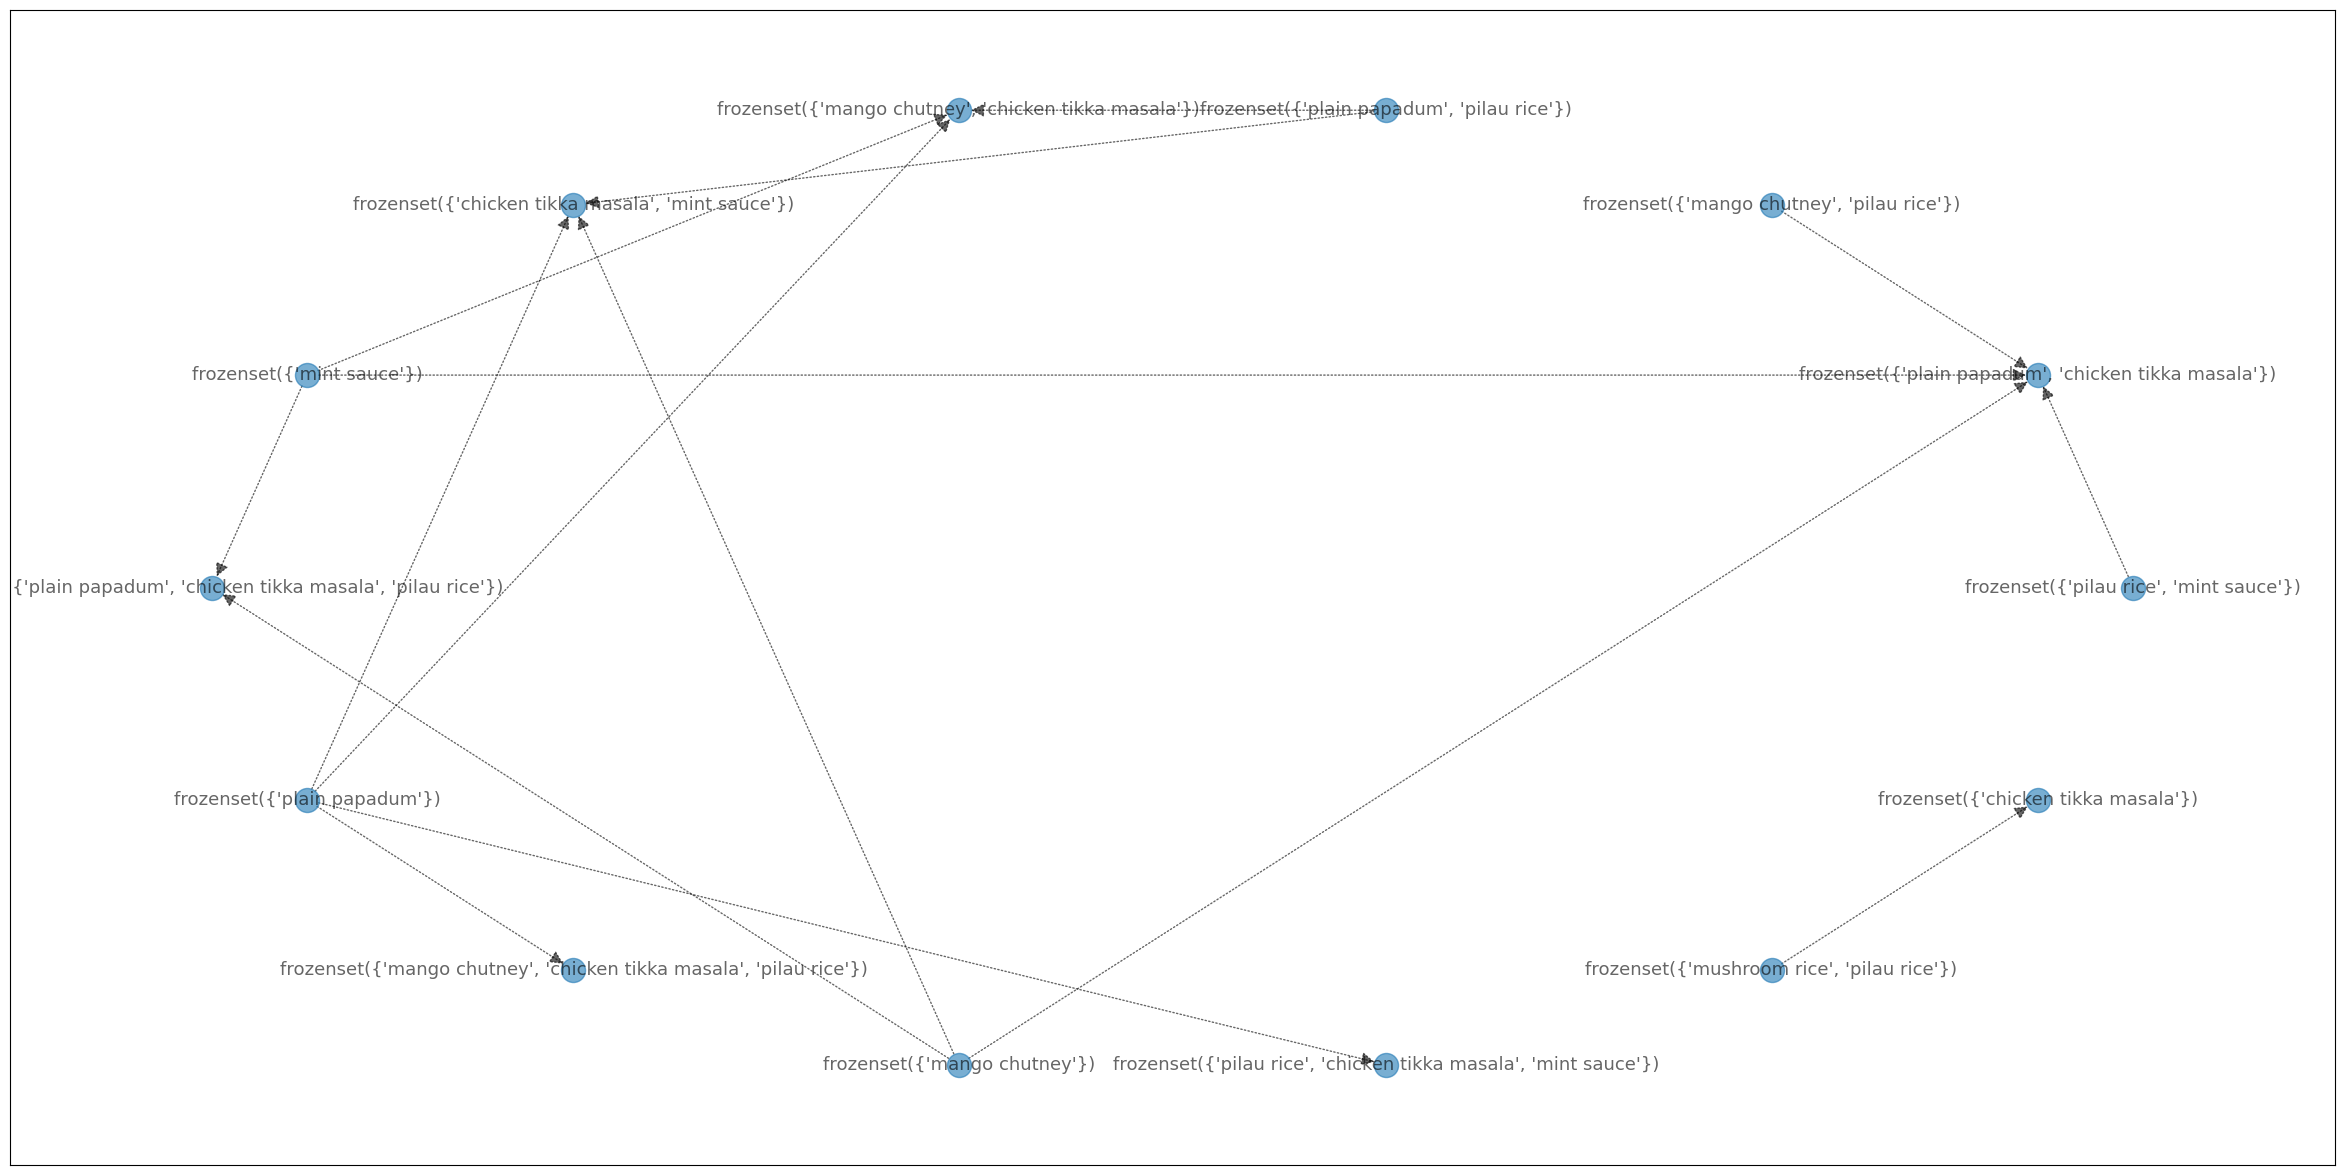

In [24]:
plt.figure(figsize=(30,15))
nx.draw_networkx(graph,pos=nx.circular_layout(graph),style=':',font_size=13,alpha=0.60,arrowsize=20)
plt.show()

We have seen, by implementing the Apriori Algorithm, we can drive revenue and profits for takeaway service by analyzing consumer’s purchasing behavior.